In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

# Problem 1

## (a)

In [52]:
# data loading
covid_data= pd.read_csv("data/COVIDincubation.txt")
covid_data.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


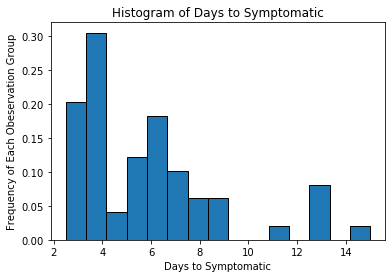

In [53]:
# first histogram: all the data
symp_days_all = covid_data["symp_days"].values
fig = plt.figure()
plt.hist(symp_days_all, bins=15, density=True, edgecolor='black')
plt.xlabel("Days to Symptomatic")
plt.ylabel("Frequency of Each Obeservation Group")
plt.title("Histogram of Days to Symptomatic")
plt.show()

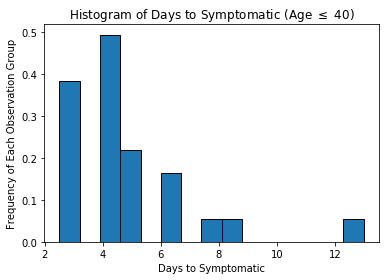

In [54]:
# second histogram: Age <= 40 
symp_days_less40 = covid_data.loc[covid_data["age"] <= 40]["symp_days"]
fig = plt.figure()
plt.hist(symp_days_less40, bins=15, density=True, edgecolor='black')
plt.xlabel("Days to Symptomatic")
plt.ylabel("Frequency of Each Observation Group")
plt.title(r"Histogram of Days to Symptomatic (Age $\leq$ 40)")
plt.show()

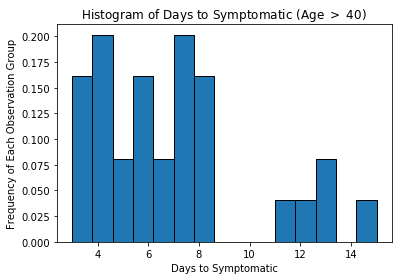

In [55]:
# third histogram: Age > 40 histogram
symp_days_more40 = covid_data.loc[covid_data["age"] > 40]["symp_days"]
fig = plt.figure()
plt.hist(symp_days_more40, bins=15, density=True, edgecolor='black')
plt.xlabel("Days to Symptomatic")
plt.ylabel("Frequency of Each Observation Group")
plt.title(r"Histogram of Days to Symptomatic (Age $>$ 40)")
plt.show()

## (b)

In [56]:
#optimal bandwidth searching
#common parameter setting
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    {"bandwidth": bandwidths},
    cv=LeaveOneOut()
)


#for all observations
grid.fit(symp_days_all[:, None])
opt_all = grid.best_params_['bandwidth']
print("The optimal bandwidths for KDE of all the sample is {}.".format(opt_all))


#for <= 40 group
grid.fit(symp_days_less40[:, None])
opt_less40 = grid.best_params_['bandwidth']
print(r"The optimal bandwidths for KDE of the age<=40 sample is {}.".format(opt_less40))


#for >40 group
grid.fit(symp_days_more40[:, None])
opt_more40 = grid.best_params_['bandwidth']
print(r"The optimal bandwidths for KDE of the age>40  sample is {}.".format(opt_more40))

The optimal bandwidths for KDE of all the sample is 0.8910453324821516.
The optimal bandwidths for KDE of the age<=40 sample is 1.6233824316122782.
The optimal bandwidths for KDE of the age>40  sample is 1.1861737164524786.


In [57]:
#fit KDE models

# the overall sample KDE model
kde_all = KernelDensity(bandwidth=opt_all, kernel="gaussian")
kde_all.fit(symp_days_all[:, None])

# the age <= 40 sample KDE model
kde_less40= KernelDensity(bandwidth=opt_less40, kernel="gaussian")
kde_less40.fit(symp_days_less40[:, None])


# the age > 40 sample KDE model
kde_more40 = KernelDensity(bandwidth=opt_more40, kernel="gaussian")
kde_more40.fit(symp_days_more40[:, None])

KernelDensity(algorithm='auto', atol=0, bandwidth=1.1861737164524786,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

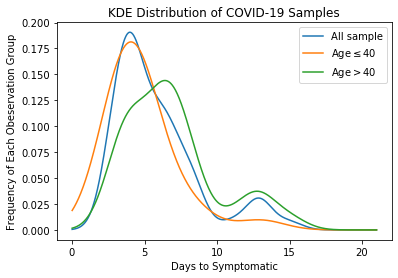

In [58]:
# Plot the three KDE models
x_pts=np.linspace(0.01,21,1000).reshape((1000,1))
log_prob_all = kde_all.score_samples(x_pts).reshape((1000,1))
log_prob_less40 = kde_less40.score_samples(x_pts).reshape((1000,1))
log_prob_more40 = kde_more40.score_samples(x_pts).reshape((1000,1))

fig = plt.figure()
plt.plot(x_pts, np.exp(log_prob_all), label="All sample")
plt.plot(x_pts, np.exp(log_prob_less40), label=r"Age$\leq$40")
plt.plot(x_pts, np.exp(log_prob_more40), label=r"Age$>$40")
plt.xlabel("Days to Symptomatic")
plt.ylabel("Frequency of Each Obeservation Group")
plt.title("KDE Distribution of COVID-19 Samples")
plt.legend()
plt.show()

## (c)

(1)young people (age $\leq 40$) generally have shorter incubation periods(with peak at 5) than old ones (age $> 40$), with two peaks respectively at 7 and 13).<br>
(2)The variance of incubation period is smaller in the young people group and larger in the old group.<br>

# Problem 2

## (a)

In [59]:
#import the data
bq_data = np.loadtxt('data/BQ_probmat.txt', delimiter=',')

In [60]:
#take a look at the data 
print('Bequest distribution by income group:', np.sum(bq_data, axis=0))
print('Bequest distribution by age group:', np.sum(bq_data, axis=1))
print('Sum of all probabilities', np.sum(bq_data))

Bequest distribution by income group: [0.01214584 0.00817072 0.01590964 0.0139963  0.01383075 0.06927237
 0.86667437]
Bequest distribution by age group: [8.86582658e-04 5.70017321e-04 1.22808428e-02 6.89456419e-04
 2.13752835e-04 3.07249416e-03 2.15844659e-03 1.14127672e-03
 9.77767430e-03 1.25006312e-02 7.32933120e-03 8.90001319e-03
 4.36423812e-03 8.79963316e-03 5.31438054e-03 7.46667436e-03
 9.86805613e-03 1.24892682e-02 4.88834783e-03 5.27214505e-03
 3.58273277e-02 1.16728805e-02 1.02956537e-02 1.09182048e-02
 2.34851553e-02 1.87283522e-02 3.93666749e-02 1.87449101e-02
 4.88500163e-02 1.59935003e-02 2.43528902e-02 2.56744256e-02
 1.56556262e-02 5.09342207e-02 2.04055385e-02 1.57812659e-02
 4.72762613e-02 1.76250983e-02 2.83611980e-02 1.34761987e-02
 6.12574170e-02 2.41355622e-02 1.98039177e-02 2.21873164e-02
 3.56284346e-02 4.49420967e-02 1.14887709e-02 2.83048159e-02
 8.92448997e-03 1.13632467e-02 1.59677078e-02 1.39055369e-02
 6.78948218e-03 1.92259141e-02 9.17281200e-03 4.914082

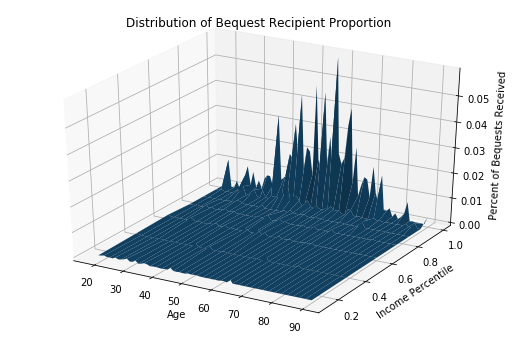

In [67]:
bq_data=bq_data/np.sum(bq_data)  #normalize using sum of probablities
age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
inc_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

#make the 3d plot
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, inc_mat, bq_mat)
ax.set_title('Distribution of Bequest Recipient Proportion')
ax.set_xlabel('Age')
ax.set_ylabel('Income Percentile')
ax.set_zlabel('Percent of Bequests Received')
plt.show()

## (b)

In [62]:
#data loading
bq_ind = pd.read_csv('data/BQ_ind_data.txt')

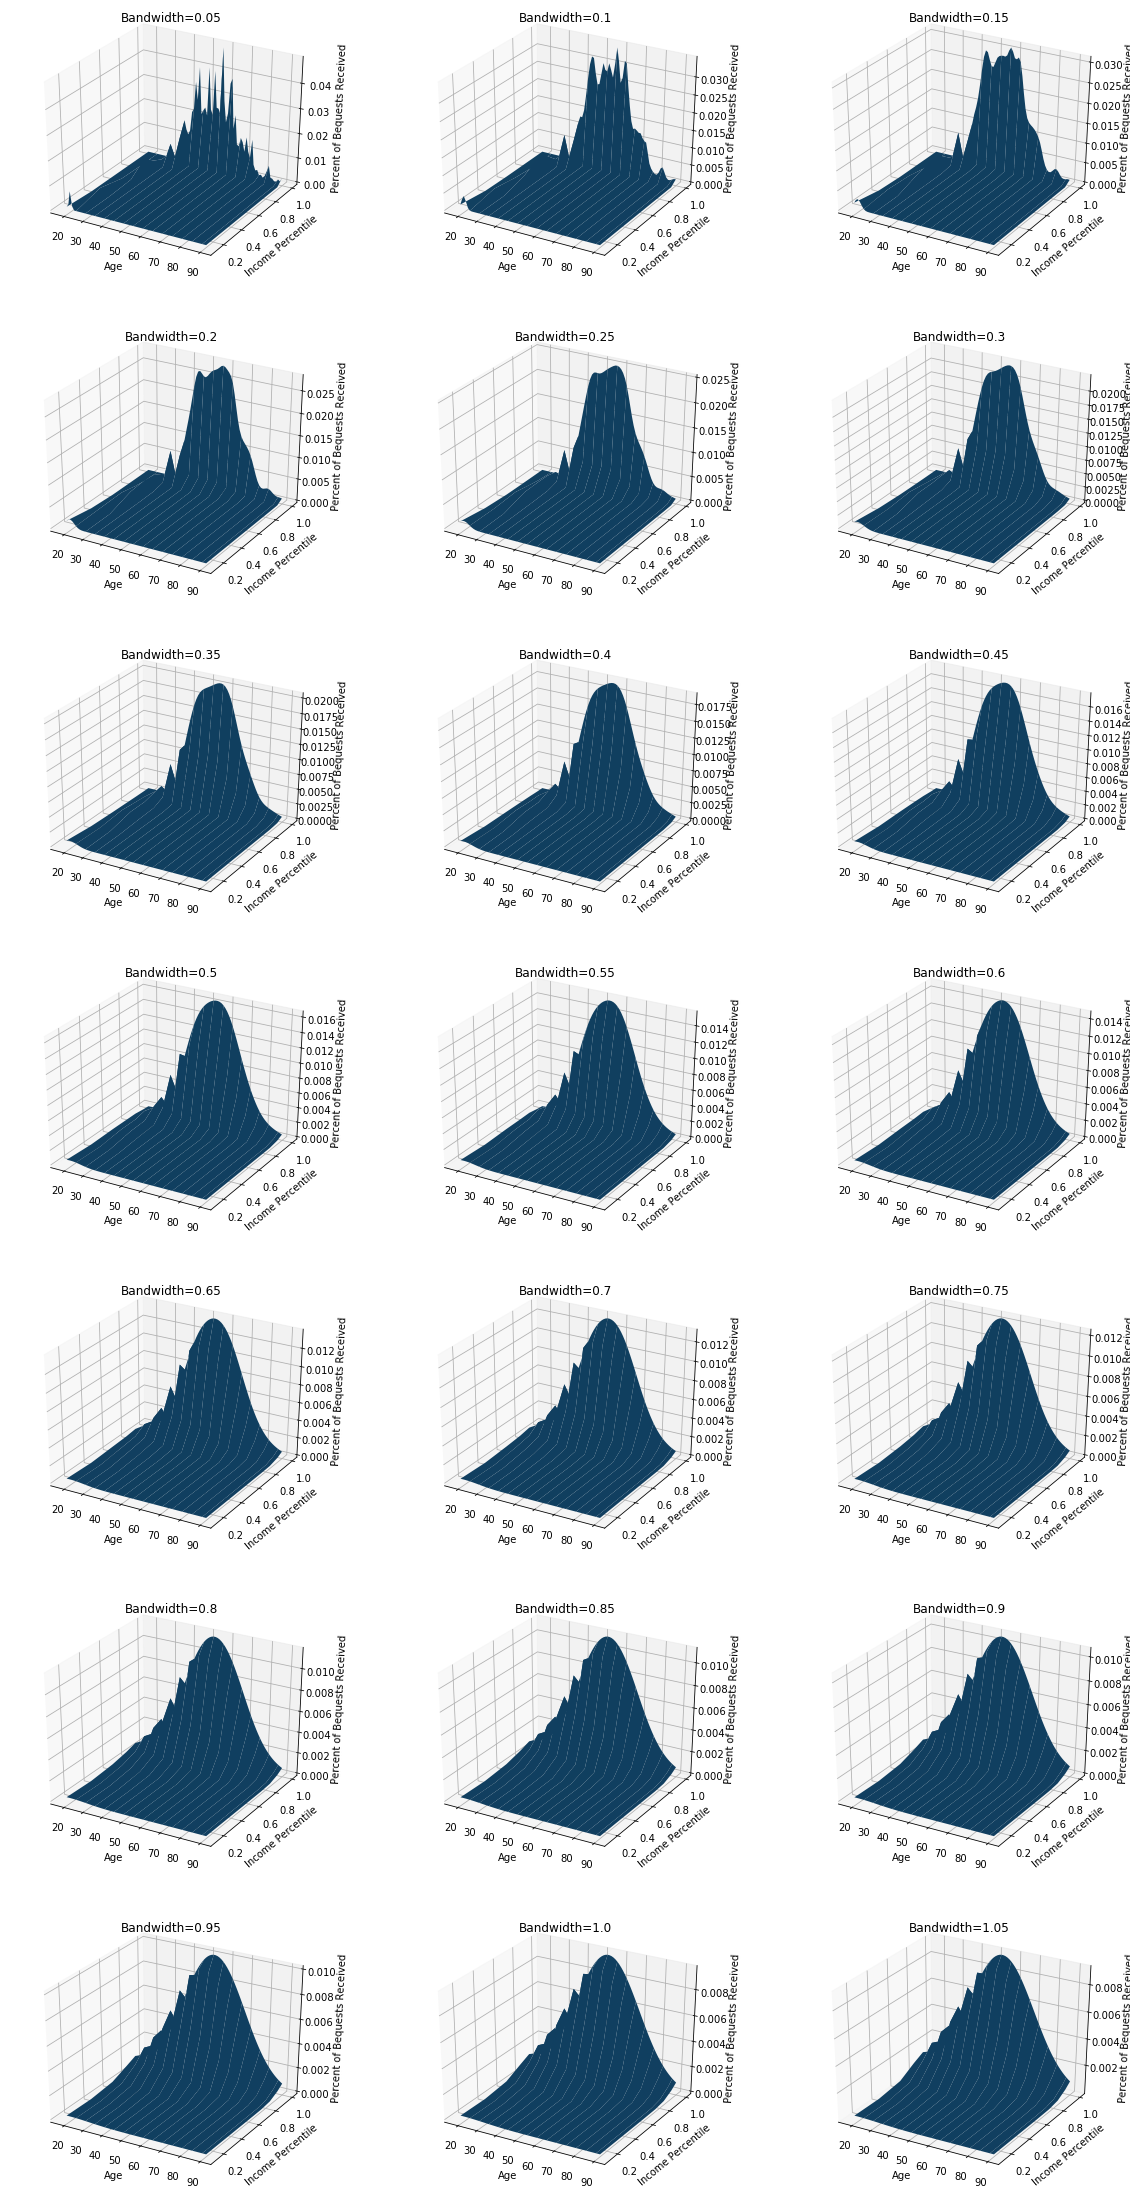

In [63]:
#test different bandwidths to choose the best one
fig = plt.figure(figsize=(20, 40))
gs = fig.add_gridspec(7, 3)
coords = np.vstack([items.ravel() for items in [age_mat, inc_mat]])

bandwidth = 0.0
for i in range(7):
    for j in range(3):
        bandwidth += 0.05
        kernel = gaussian_kde(bq_ind.T, bw_method=bandwidth)
        
        Z = np.reshape(kernel(coords), age_mat.shape)
        Z_scaled = Z / float(np.sum(Z))
        
        ax = fig.add_subplot(gs[i, j], projection="3d")
        ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
        ax.set_xlabel("Age")
        ax.set_ylabel("Income Percentile")
        ax.set_zlabel("Percent of Bequests Received")
        ax.set_title("Bandwidth={}".format(round(bandwidth, 2), fontsize=5))
        
        if bandwidth == 1:
            break
    if bandwidth == 1:
        break

I choose $\lambda$ = 0.2, since it is close to the real data, but also capable of generating a 
relatively smooth surface, striking a good balance between variance and bias

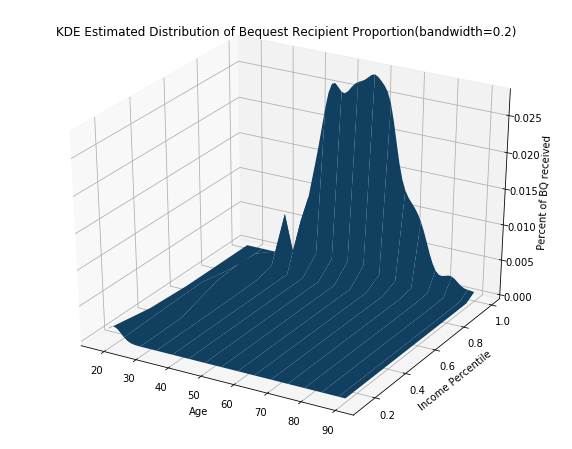

In [64]:
# Plot with bandwidth=0.2
bandwidth = 0.2
kernel = gaussian_kde(bq_ind.T, bw_method=bandwidth)
coords = np.vstack([items.ravel() for items in [age_mat, income_mat]])

Z = np.reshape(kernel(coords), age_mat.shape)
Z_scaled = Z / float(np.sum(Z))

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection="3d")
ax.plot_surface(age_mat, income_mat, Z_scaled, rstride=5)
ax.set_xlabel("Age")
ax.set_ylabel("Income Percentile")
ax.set_zlabel("Percent of BQ received")
ax.set_title('KDE Estimated Distribution of Bequest Recipient Proportion(bandwidth=0.2)')
plt.show()

In [65]:
print("The estimated density for bequest recipients who are age 61 in the 6th lifetime income category is{}.".format(Z_scaled[61 - 18 + 1][5]))

The estimated density for bequest recipients who are age 61 in the 6th lifetime income category is0.0014615780069221313.
